In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import pickle
import random
data_path = '../results/cluster_files/cifar100_notliving_trgt_b_clusters.pkl'
data_path2 = '../results/cluster_files/test_cluster2.pkl'

In [2]:
def get_data(data_file):
    data = pickle.load(open(data_file,'rb'))
    train_data = data['train']
    test_data = data['test']
    return (train_data, test_data)

In [23]:
train_data, test_data =  get_data(data_path)
train_data2, test_data2 =  get_data(data_path2)
train_data[0][5][0].shape, test_data[0][5][0].shape,train_data2[0][0][0].shape, test_data2[0][0][0].shape

((10, 640), (100, 640), (500, 640), (100, 640))

In [4]:
def stack_data(in_dict):
    class_ids = sorted(in_dict.keys())
    class_idx = {x:ctr for ctr,x in enumerate(class_ids)}
    num_classes = len(class_ids) 

    data = [in_dict[x][0] for x in class_ids]
    labels = []
    for x in class_ids:
        num_samps, num_classes_orig = in_dict[x][1].shape
        label_array = np.zeros((num_samps, num_classes))
        curr_hot = class_idx[x]
        label_array[:,curr_hot] = 1
        labels.append(label_array)

    data = np.vstack(data)
    labels = np.vstack(labels)

    return data, labels

In [5]:
def show_eigenval_plot(S, epoch, pdf):

    fig, ax = plt.subplots(1,1,sharex=True)
    eig_list = list(S)
    ax.plot(eig_list,color = 'steelblue',marker="o")
    ax.set_xlabel('Eigenvectors')
    ax.set_ylabel('Eigenvalues')
    ax.set_title('Eigenvalues ar Epoch: ' + str(epoch))
    pdf.savefig( fig )
    

In [6]:
def plot_eigen_vals(data, outname):
    epochs = sorted(data.keys())
    pdf = matplotlib.backends.backend_pdf.PdfPages(outname)
    out_dict = {}
    for curr_epoch in epochs:
        curr_data, curr_labels = stack_data(data[curr_epoch])
        centered_data = curr_data - np.mean(curr_data)
        U, S, V = np.linalg.svd(centered_data, full_matrices=False)
        components = V
        coefficients = np.dot(U, np.diag(S))
        show_eigenval_plot(S, curr_epoch, pdf)
        out_dict[curr_epoch] = S[0]/S[1]
    pdf.close()
    return out_dict

<ipython-input-5-da215c1d96da>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1,sharex=True)


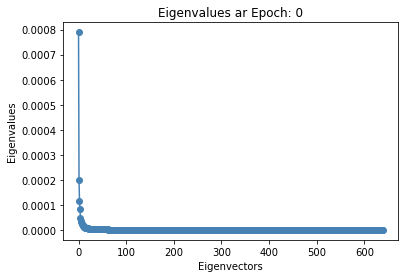

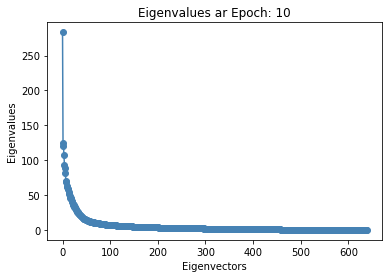

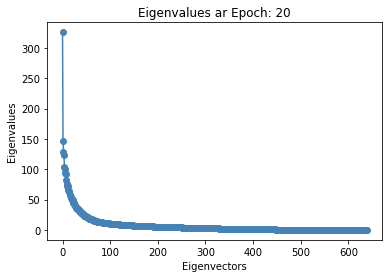

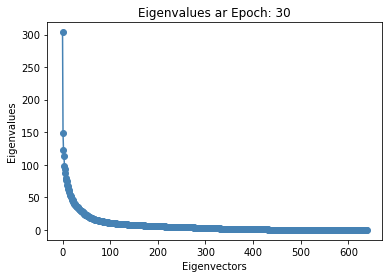

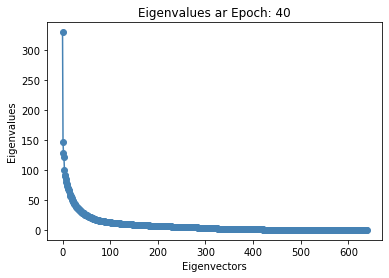

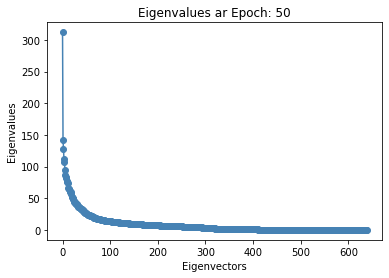

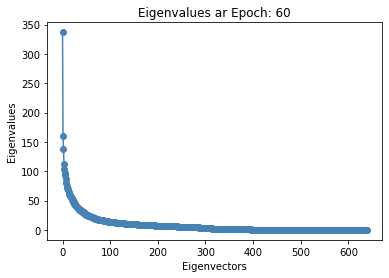

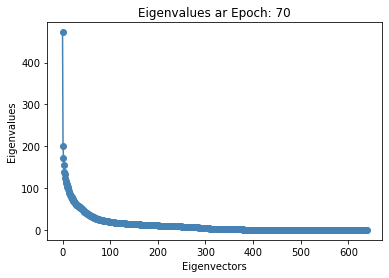

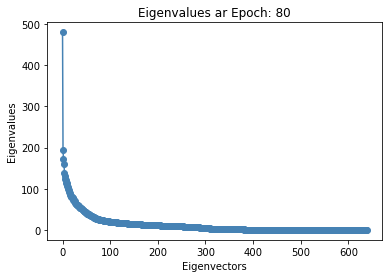

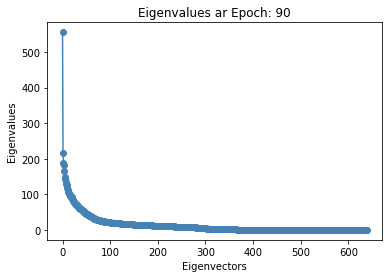

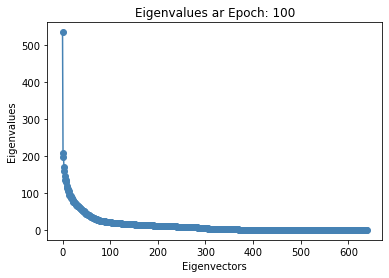

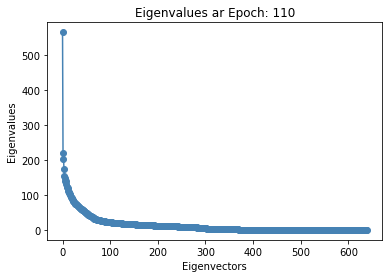

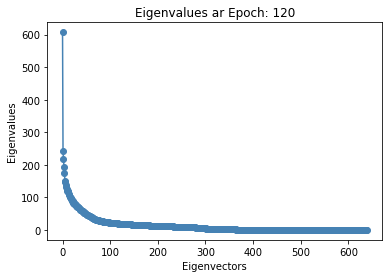

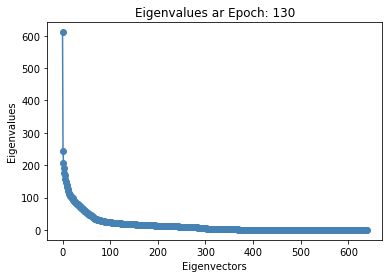

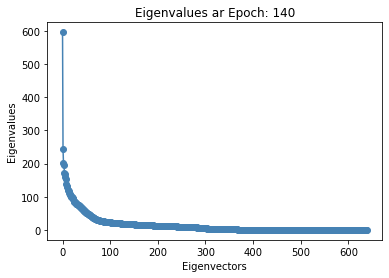

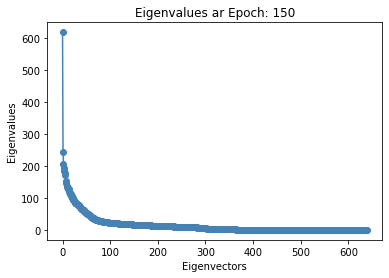

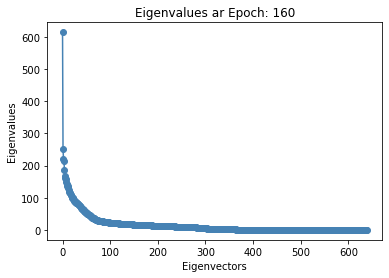

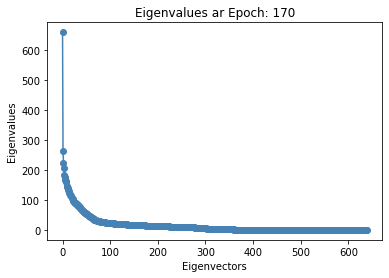

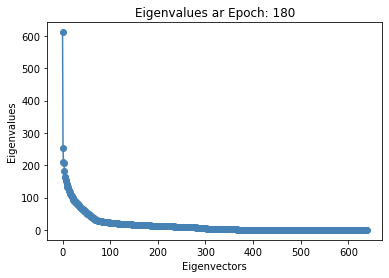

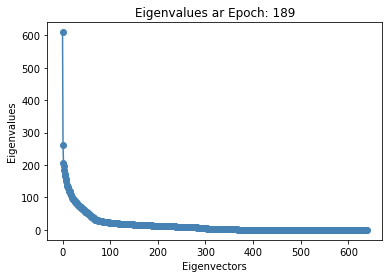

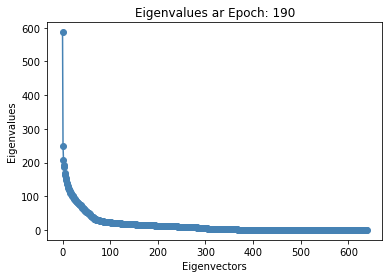

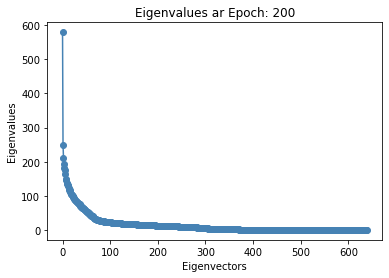

In [24]:
od35 = plot_eigen_vals(test_data,'35tfer_eigs.pdf')

<ipython-input-5-da215c1d96da>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1,sharex=True)


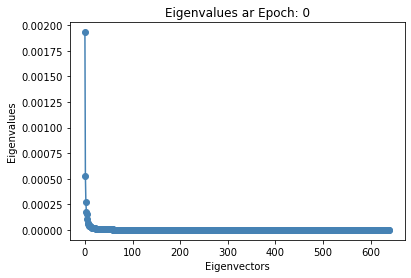

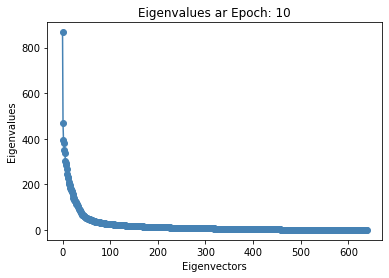

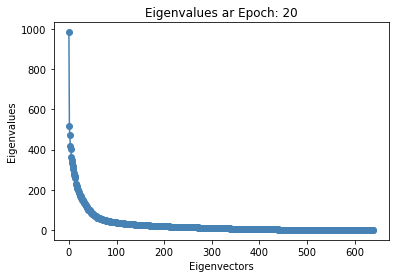

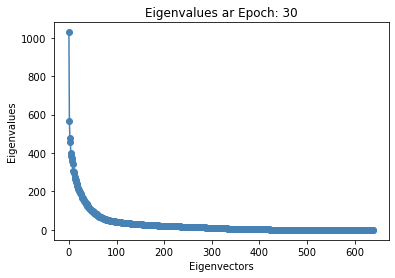

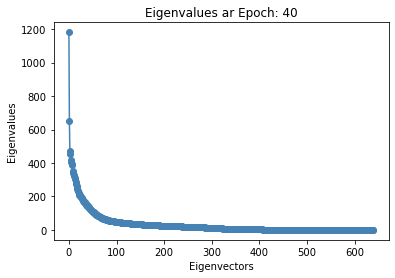

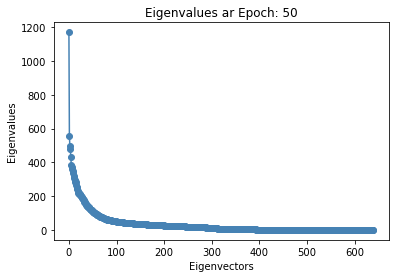

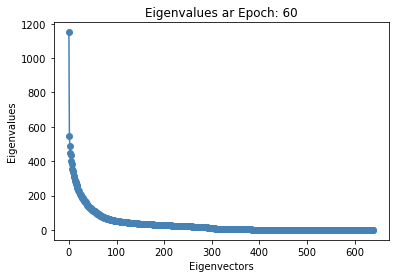

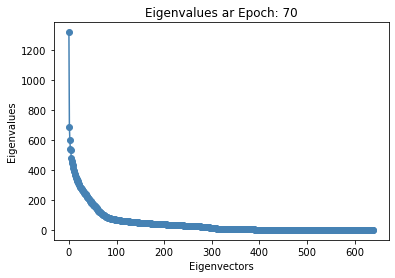

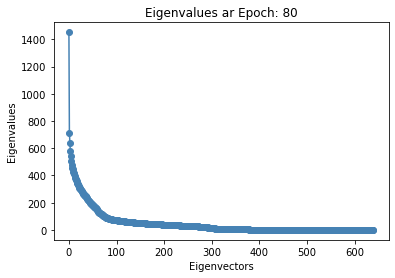

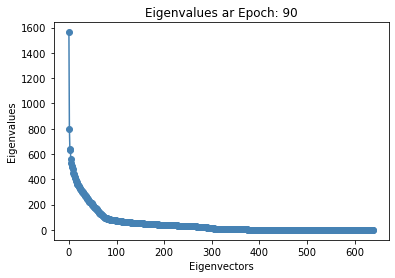

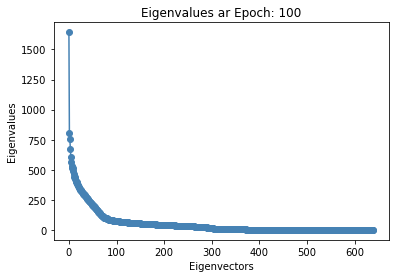

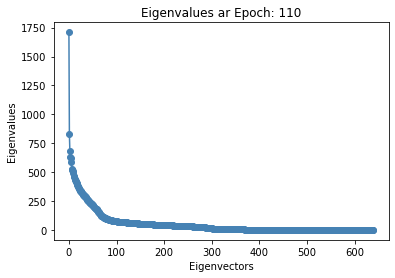

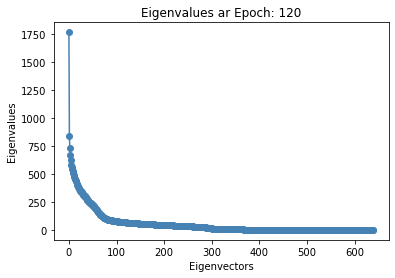

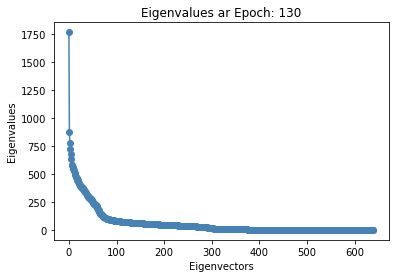

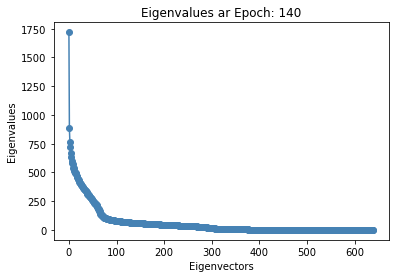

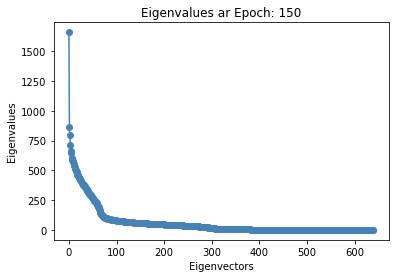

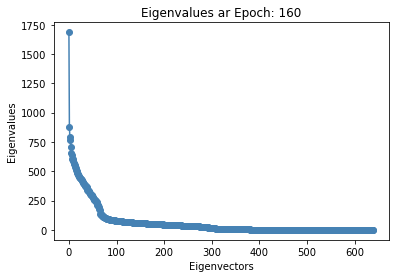

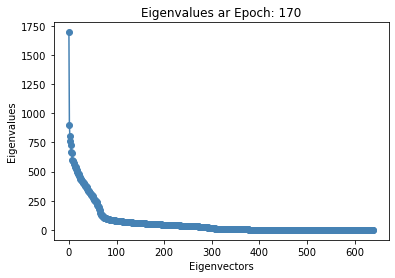

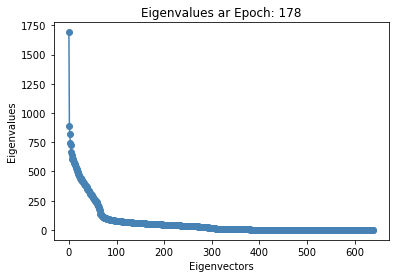

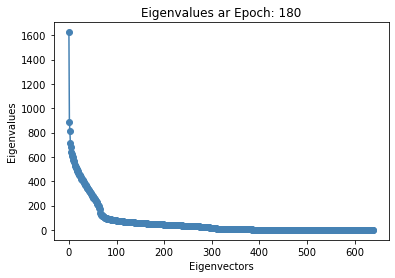

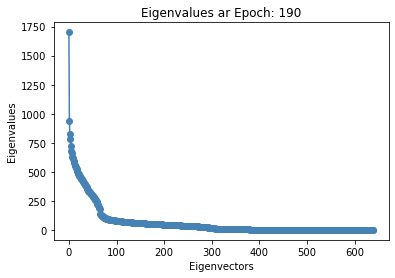

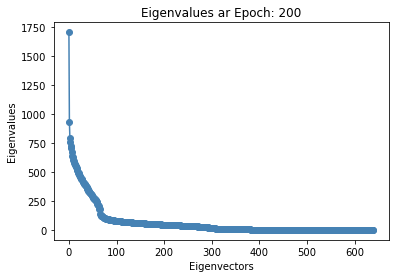

In [8]:
od65 = plot_eigen_vals(train_data2,'65src_eigs.pdf')

In [25]:
od35

{0: 3.9909866,
 10: 2.2774963,
 20: 2.220594,
 30: 2.0357504,
 40: 2.2553499,
 50: 2.1883094,
 60: 2.0985334,
 70: 2.361025,
 80: 2.4710276,
 90: 2.5662212,
 100: 2.5722117,
 110: 2.5718749,
 120: 2.4922607,
 130: 2.5079002,
 140: 2.4423366,
 150: 2.549434,
 160: 2.4394453,
 170: 2.503884,
 180: 2.410584,
 189: 2.3274558,
 190: 2.3526845,
 200: 2.3159566}

In [10]:
od65

{0: 3.6384451,
 10: 1.8568417,
 20: 1.9050368,
 30: 1.8231926,
 40: 1.8202149,
 50: 2.1026711,
 60: 2.1097872,
 70: 1.917887,
 80: 2.0329337,
 90: 1.9557699,
 100: 2.0297873,
 110: 2.0668983,
 120: 2.1028821,
 130: 2.0208943,
 140: 1.94677,
 150: 1.9136975,
 160: 1.9142543,
 170: 1.8900468,
 178: 1.895292,
 180: 1.8254936,
 190: 1.8221548,
 200: 1.8263657}

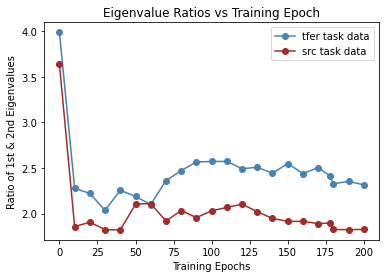

In [29]:
ep = [x for x in sorted(od65.keys())]
eig35 = [od35[x] for x in sorted(od35.keys())]
eig65 = [od65[x] for x in sorted(od65.keys())]
fig, ax = plt.subplots(1,1,sharex=True)
ax.plot(ep,eig35,color = 'steelblue',marker="o",label="tfer task data")
ax.plot(ep,eig65,color = 'brown',marker="o",label="src task data")
ax.set_xlabel('Training Epochs')
ax.set_ylabel('Ratio of 1st & 2nd Eigenvalues')
ax.set_title('Eigenvalue Ratios vs Training Epoch')
ax.legend()

